# Aligning Music Using Dynamic Time Warping Algorithm

For Algorithmics project, we will try to use the dynamic time warping algorithm for aligning two
music files and making them play together.

First, we will load in two music files with the Librosa library. Then we will examine the files.

Sources used for creating this notebook:
[Librosa](https://librosa.org/librosa_gallery/auto_examples/plot_music_sync.html)

In [27]:
from __future__ import print_function
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import math

#Audio processing
import librosa
import librosa.display
from dtw import *
from IPython.display import Audio
import scipy.io.wavfile as wavf # Listening audio

## Reading in audio files

The audio files have to be in .WAV format.

In [ ]:
AUDIO_FOLDER = "audio/short files/"
audio_files = [join(AUDIO_FOLDER, f) for f in listdir(AUDIO_FOLDER)
               if isfile(join(AUDIO_FOLDER,f))]
print("Found files", audio_files)

In [5]:
#MP3 does not work!
# https://github.com/librosa/librosa/issues/945

for file_name in audio_files:
    print(file_name)
    x, fs = librosa.load(file_name)
    print("The length and sampling rate of the time series is", len(x), fs)
    print()

audio/short files/clavichord.WAV
The length and sampling rate of the time series is 357761 22050

audio/short files/fast.WAV
The length and sampling rate of the time series is 211393 22050

audio/short files/norhythm.WAV
The length and sampling rate of the time series is 271937 22050

audio/short files/normal.WAV
The length and sampling rate of the time series is 257729 22050

audio/short files/organ.WAV
The length and sampling rate of the time series is 317057 22050

audio/short files/skipnotes.WAV
The length and sampling rate of the time series is 214977 22050

audio/short files/slow.WAV
The length and sampling rate of the time series is 340161 22050

audio/short files/veryfast.WAV
The length and sampling rate of the time series is 135425 22050

audio/short files/veryslow.WAV
The length and sampling rate of the time series is 467649 22050



## Choosing files for analysis

We will present the analysis by showing the results of a piano-like instrument, clavichord and a
piano version with incorrect rhythm. The piece is Chopin Etudes Op.25 No.11.

audio/short files/clavichord.WAV


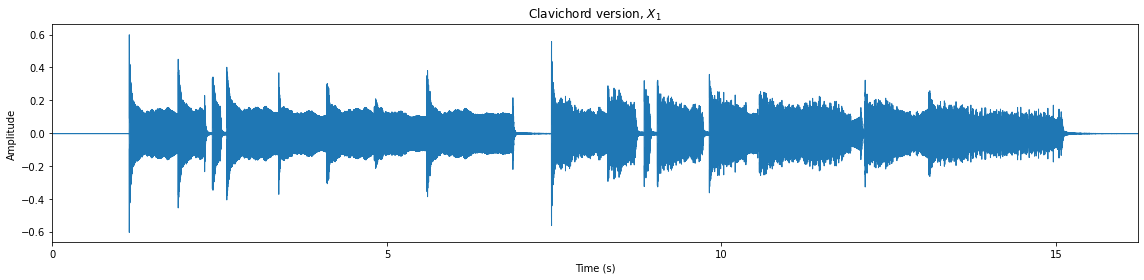

In [28]:
file_name1 = audio_files[audio_files.index("audio/short files/clavichord.WAV")]
print(file_name1)
x_1, fs = librosa.load(file_name1)
plt.figure(figsize=(16, 4))
librosa.display.waveplot(x_1, sr=fs)
plt.title('Clavichord version, $X_1$')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.savefig("./figures/x1.png")
plt.tight_layout()

audio/short files/norhythm.WAV


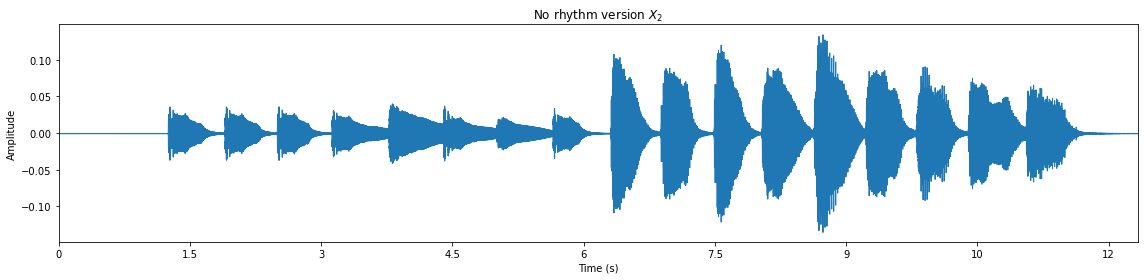

In [29]:
file_name2 = audio_files[audio_files.index("audio/short files/norhythm.WAV")]
print(file_name2)
x_2, fs = librosa.load(file_name2)
plt.figure(figsize=(16, 4))
librosa.display.waveplot(x_2, sr=fs)
plt.title('No rhythm version $X_2$')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.savefig("./figures/x2.png")
plt.tight_layout()

## Visualizing the audio files with a chromagram


In [ ]:
n_fft = 4410
hop_size = 2205

x_1_chroma = librosa.feature.chroma_stft(y=x_1, sr=fs, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)
x_2_chroma = librosa.feature.chroma_stft(y=x_2, sr=fs, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)

plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
plt.title('Chroma Representation of $X_1$')
librosa.display.specshow(x_1_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.subplot(2, 1, 2)
plt.title('Chroma Representation of $X_2$')
librosa.display.specshow(x_2_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.savefig("./figures/chroma.png")
plt.tight_layout()

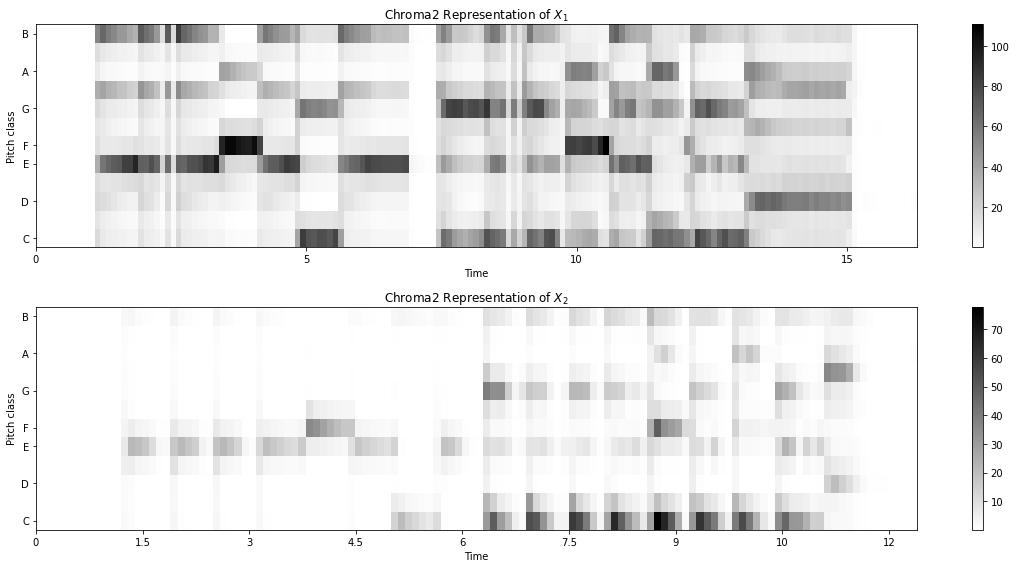

In [30]:
# https://librosa.org/doc/latest/generated/librosa.sequence.dtw.html?highlight=dtw
D, wp, steps = librosa.sequence.dtw(X=x_1_chroma, Y=x_2_chroma, metric='cosine',
                                    return_steps=True)
# D - accumulated cost matrix

#second version of Chroma
x_1_chroma_2 = librosa.feature.chroma_stft(y=x_1, sr=fs, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)
x_2_chroma_2 = librosa.feature.chroma_stft(y=x_2, sr=fs, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)

step_max1 = math.floor(len(x_1)/hop_size)
step_max2 = math.floor(len(x_2)/hop_size)
factor1 = [0]*step_max1
factor2 = [0]*step_max2

for step in range(step_max1):
    start = step * hop_size
    end = (step + 1) * hop_size
    factor1[step] = sum(abs(x_1[start:end]))

for step in range(step_max2):
    start = step * hop_size
    end = (step + 1) * hop_size
    factor2[step] = sum(abs(x_2[start:end]))

#max_coefficient1 = max(factor1)
#factor1 = factor1 / max_coefficient1
#max_coefficient2 = max(factor2)
#factor2 = factor2 / max_coefficient2

x_1_chroma_2 = x_1_chroma_2.T
x_2_chroma_2 = x_2_chroma_2.T

for step in range(step_max1):
    x_1_chroma_2[step] = x_1_chroma_2[step] * factor1[step]
for step in range(step_max2):
    x_2_chroma_2[step] = x_2_chroma_2[step] * factor2[step]

x_1_chroma_2 = x_1_chroma_2.T
x_2_chroma_2 = x_2_chroma_2.T

plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
plt.title('Chroma2 Representation of $X_1$')
librosa.display.specshow(x_1_chroma_2, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.subplot(2, 1, 2)
plt.title('Chroma2 Representation of $X_2$')
librosa.display.specshow(x_2_chroma_2, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.savefig("./figures/chroma2.png")
plt.tight_layout()

## Visualizing accumulated cost warping path

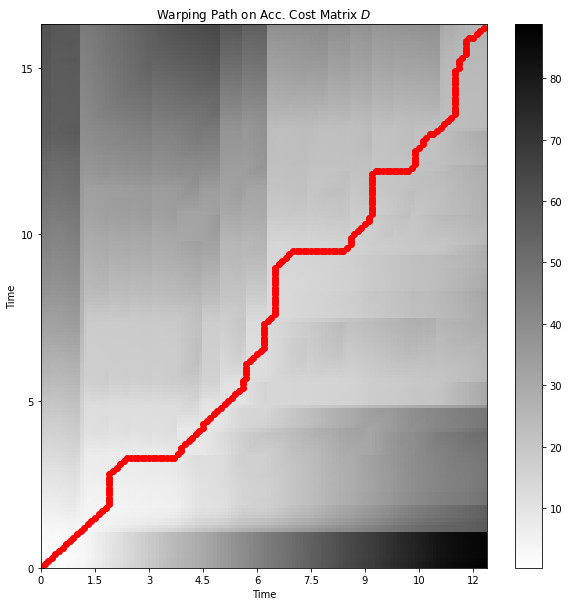

In [31]:
D, wp = librosa.sequence.dtw(X=x_1_chroma, Y=x_2_chroma, metric='cosine')

wp_s = np.asarray(wp) * hop_size / fs

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
librosa.display.specshow(D, x_axis='time', y_axis='time',
                         cmap='gray_r', hop_length=hop_size)

imax = ax.imshow(D, cmap=plt.get_cmap('gray_r'),
                 origin='lower', interpolation='nearest', aspect='auto')
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
plt.title('Warping Path on Acc. Cost Matrix $D$')
plt.savefig("./figures/warp_path.png")
plt.colorbar()

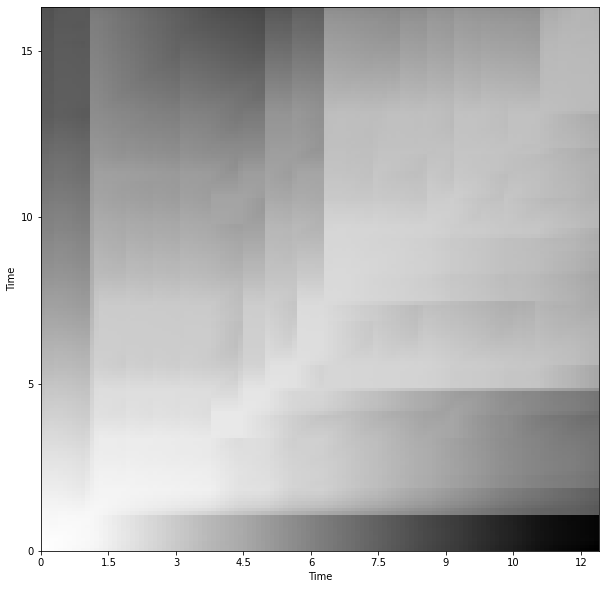

In [33]:
D2, wp2 = librosa.sequence.dtw(X=x_1_chroma_2, Y=x_2_chroma_2, metric='cosine')
wp_s2 = np.asarray(wp) * hop_size / fs

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
librosa.display.specshow(D, x_axis='time', y_axis='time',
                         cmap='gray_r', hop_length=hop_size)

## Visualizing the matches

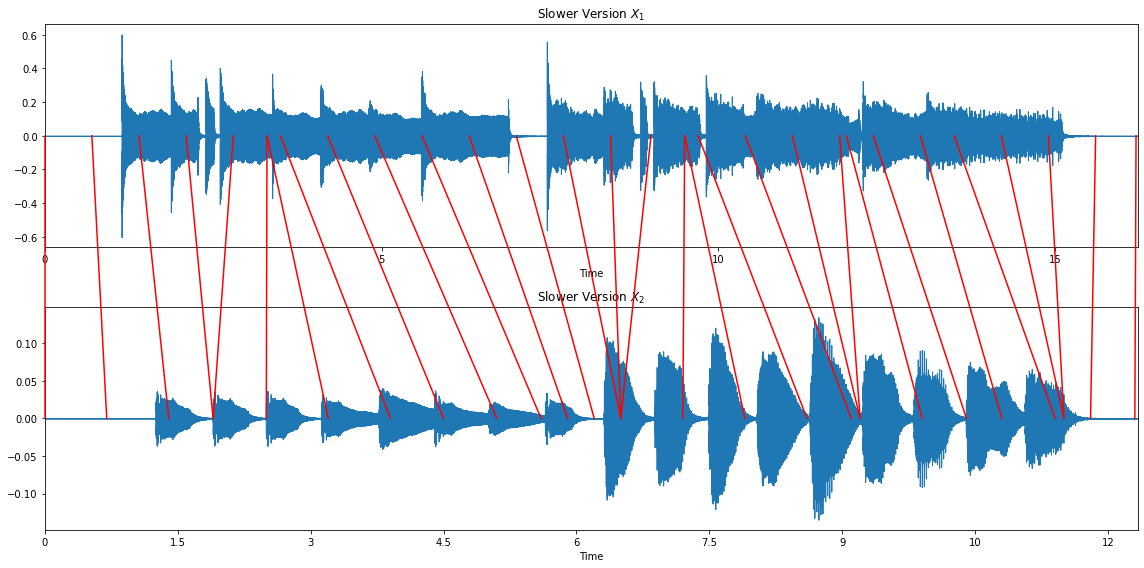

In [35]:
fig = plt.figure(figsize=(16, 8))

# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(x_1, sr=fs)
plt.title('Slower Version $X_1$')
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(x_2, sr=fs)
plt.title('Slower Version $X_2$')
ax2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
points_idx = np.int16(np.round(np.linspace(0, wp.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tp1, tp2 in wp[points_idx] * hop_size / fs:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tp1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tp2, 0]))

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)

fig.lines = lines
plt.tight_layout()

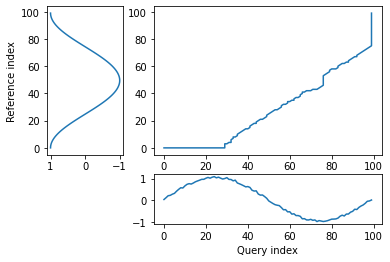

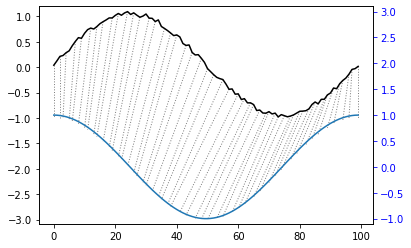

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



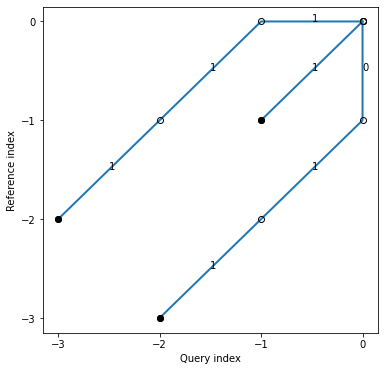

<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

In [18]:
# https://dynamictimewarping.github.io/py-api/html/

# A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)

query = np.sin(idx) + np.random.uniform(size=100)/10.0
#query = x_1[::1000]
# A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)
#template = x_2[::1000]

## Find the best match with the canonical recursion formula

alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, step_pattern=rabinerJuangStepPattern(6, "c")).plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

## Visualizing the matches

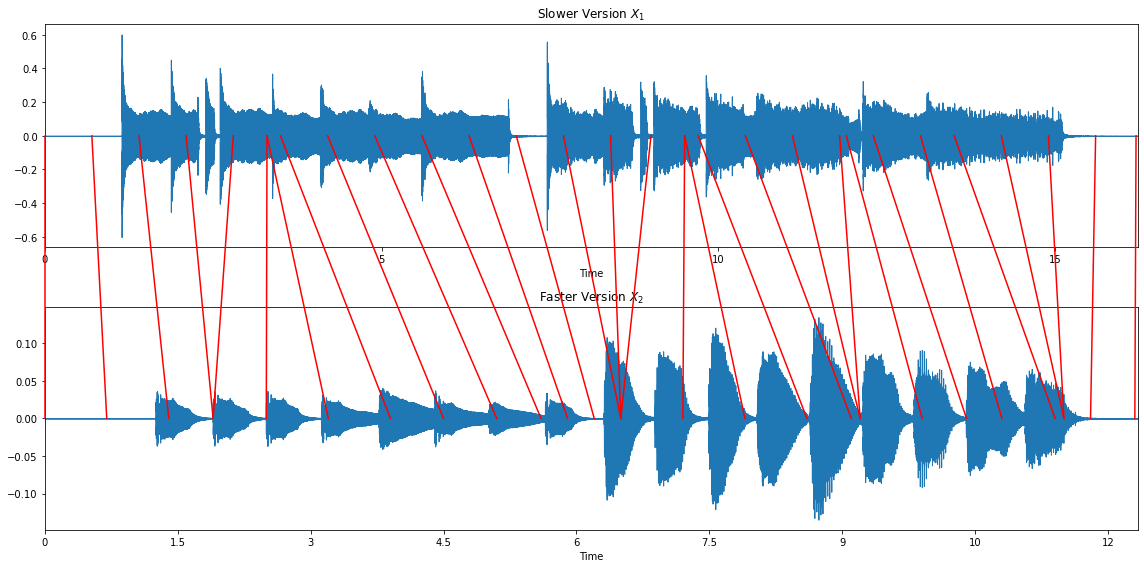

In [37]:
fig = plt.figure(figsize=(16, 8))

# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(x_1, sr=fs)
plt.title('Slower Version $X_1$')
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(x_2, sr=fs)
plt.title('Faster Version $X_2$')
ax2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
points_idx = np.int16(np.round(np.linspace(0, wp2.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tp1, tp2 in wp[points_idx] * hop_size / fs:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tp1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tp2, 0]))

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)

fig.lines = lines
plt.tight_layout()


## Merging two warped audio files

In [39]:
x_warped = x_1 #we copy x_1, then we stretch/shrink x_2 and add to x_warped


pairs = wp * hop_size
# pairs = wp2 * hop_size
pairs_flip = reversed(pairs)

index1 = 0
index2 = 0

#for pair in pairs_flip: #this way gives a result with a lot of noise :'(
#    for i in range(index1, pair[0]):
#        x_warped[i] += x_2[int(index2 + (pair[1] - index2)*(pair[0] - i)/(pair[0] - index1) )]

#let's try something that gives less noise. Spoiler: It doesn't produce less noise haha
#print(pairs)
for pair in pairs_flip:
    if (pair[0] - index1) == (pair[1] - index2): #the arrays are already aligned
        x_warped[index1:pair[0]] += x_2[index2:pair[1]]

    elif (pair[0] - index1) > (pair[1] - index2): #array2 is smaller and must be streched
        len_to_fill = pair[0] - index1
        array_stretched = np.pad(np.array(x_2[index2:(pair[1]+1)]), [0,len_to_fill], mode='wrap')
        x_warped[index1:pair[0]] += array_stretched[:len_to_fill]

    else: # (pair[0] - index1) < (pair[1] - index2) #array2 is bigger and must shrink
        x_warped[index1:pair[0]] += x_2[index2:(index2 + pair[0] - index1)]

    #update indexes now
    index1 = pair[0]
    index2 = pair[1]
    #print(f"{index1}, {index2}")

fs = 22050
out_f = './audio/short files/x_warped.WAV'

wavf.write(out_f, fs, x_warped)

Audio('./audio/short files/x_warped.WAV')